In [90]:
from graphviz import Digraph
# from graphviz import Digraph

def visualize_tree(tree):
    if tree is None:
        return 'Nothing in the tree!'
    
    def add_nodes_edges(tree, dot=None):
        
        if dot is None:
            dot = Digraph()
            dot.attr('node', shape='circle')
            dot.node(name=str(tree), label=str(tree.val))
            
        for child in [tree.left, tree.right]: # do for all children
            if child is not None:
                if child == tree.left: dot.attr('node', shape='circle', style='filled',
                fillcolor='lightblue')
                if child == tree.right: dot.attr('node', shape='doublecircle', style='filled',
                fillcolor='seashell')
                dot.node(name=str(child) ,label=str(child.val))
                dot.edge(str(tree), str(child))
                dot = add_nodes_edges(child, dot=dot) # recursive call
        return dot
    dot = add_nodes_edges(tree)
    
    display(dot)
    
def print_tree(tree, level=0, label='.'):
    print(' ' * (level*2) + label + ' : ', tree.val)
    for child, lbl in zip([tree.left, tree.right], ['L', 'R']):
        if child is not None:
            print_tree(child, level+1, lbl)


In [137]:
class Node:
    
    ## Node Classs has left and right option or pointer and val is the node value
    def __init__(self,val):
        self.val = val
        self.left = None
        self.right=None
        

class TreeNode(Node):
    
    def __init__(self,val,parent=None):
        super().__init__(val)
        self.parent = parent
        
    def insert(self,val):
        
        # for left child if has no left child then place it here
        if val > self.val: ## greater node at the right side 
            
            if self.right is None:
                newNode =  TreeNode(val,parent=self)
                self.right = newNode
            else:
                self.right.insert(val)
        else:
            if self.left is None:
                
                newNode = TreeNode(val,parent=self)
                self.left = newNode
            else:
                self.left.insert(val)
                
        return 
                
    def bfs(self):

        visited = [self]
        while len(visited)>0:

            current = visited.pop(0)
            
            
            print(current.val)

            if self.left :
                visited.append(current.left)


            if self.right:
                visited.append(current.right)
                
    def BreathFirstSearch(self,goalNode):
        
        
        Frontier  = [self]  # Queue # fifo Data struck use
        pathCost = 0
        visited_Nodes = []
        
        while len(Frontier)>0:
            
            current = Frontier.pop(0)
            
            if current.val not in visited_Nodes:  # avoid to repeat the node
                pathCost+=1
                if current.val == goalNode: ## if goal state reach
                    
                    return "Reached Goal "+ str(current.val) +" " +"Path Cost :" +str(pathCost)
                
                if current.left:
                    Frontier.append(current.left)
                
                if current.right:
                    Frontier.append(current.right)
            
            
    def DepthFirstSearch(self,goalNode):
        
        
        Frontier  = [self]  # Stack used lifo data strucutre
        pathCost = 0
        visited_Nodes = []
        
        while len(Frontier)>0:
            
            current = Frontier.pop()
            
            if current.val not in visited_Nodes:  # avoid to repeat the node
                pathCost+=1
                if current.val == goalNode: ## if goal state reach
                    
                    return "Reached Goal "+ str(current.val) +" " +"Path Cost : " +str(pathCost)
                
                if current.left:
                    Frontier.append(current.left)
                
                if current.right:
                    Frontier.append(current.right)
    

                

        
        
            

        


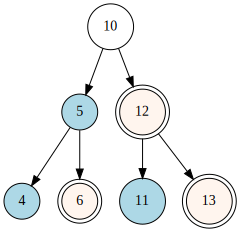

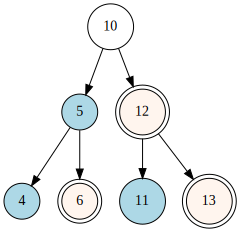

Breath First Search  Reached Goal 6 Path Cost :5
Depth First Search  Reached Goal 6 Path Cost : 6


In [138]:
Node = [12,11,5,6,4,13]

t1 = TreeNode(10)
for node in Node:
    t1.insert(node)
visualize_tree(t1)

# t1.bfs()
visualize_tree(t1)
## bfs
# print_tree(t1)
print("Breath First Search ",t1.BreathFirstSearch(6))
print("Depth First Search ", t1.DepthFirstSearch(6))


In [131]:
## Bearth First Search a
## Depth first Search


import pprint as pp
class Graph:
    
    def __init__(self):
        self.state = {} # states city : [(city,distance)
    
    def PrintEnvrionment(self):
        pp.pprint(self.state)
        
    def add_node(self,node_list):
        
        for node in node_list:
            self.state[node] = []
            
        
    def add_State (self,fromCity,toCity,pathDistance):
        if fromCity not in self.state.keys(): ## if not in graph add it 
            self.state[fromCity]= [(toCity,pathDistance)]
            
        elif fromCity in self.state.keys(): ## if already in then append their neighour
            self.state[fromCity].append((toCity,pathDistance))

        else:
            raise Exception("Already in Graph")
    def GetSuccessor(self,neighbors):
        print ("neighbors -->> {}".format(neighbors))
        
        if neighbors is None:
            return None
        ret = []
        for node in neighbors:
            if node is not None:
                ret.append(node[0])
            
        return ret
        
        
            
    def Breath_first_search(self,initialState ,goal_state):
        
        print("Initial State : {} \nGaol State : {} ".format(initialState,goal_state))
        
        if initialState not in self.state or goal_state not in self.state:
            return "Initial or Gaol State Not in the Environment"
        
        Frontier = [initialState]  ## will use Queue concept is Fifo  frist in frist out
        visited_state = []
        path_cost = 0  # Depend how much state is visted
        
        while  len(Frontier)>0:
            
            
            currentState = Frontier.pop(0)
            
            if currentState not in visited_state:
                
                print("Current State -->> {} ".format(currentState))
                print("Goal State   ->> {}".format(goal_state))
                
                if currentState == goal_state:
                    print("Path  Cost :" ,len(visited_state))
                    return "Reached Gaol"

                Successors = self.state[currentState]
                Successors = self.GetSuccessor(Successors)
                [Frontier.append(node)  for node in Successors]
                print("Frontier  -->>{}".format(Frontier))
                
                visited_state.append(currentState)
                
                print("Visited State --> ",visited_state)
                if currentState[0] is None:
                    continue
        print("Not Possible")
        
    def Death_first_search(self,initialState ,goal_state):
        
        print("Initial State : {} \nGaol State : {} ".format(initialState,goal_state))
        
        if initialState not in self.state or goal_state not in self.state:
            return "Initial or Gaol State Not in the Environment"
        
        Frontier = [initialState]  ## will use Queue concept is Fifo  frist in frist out
        visited_state = []
        path_cost = 0  # Depend how much state is visted
        
        while  len(Frontier)>0:
            
            
            currentState = Frontier.pop()
            
            if currentState not in visited_state:
                
                print("Current State -->> {} ".format(currentState))
                print("Goal State   ->> {}".format(goal_state))
                
                if currentState == goal_state:
                    print("Path  Cost :" ,len(visited_state))
                    return "Reached Gaol"

                Successors = self.state[currentState]
                Successors = self.GetSuccessor(Successors)
                [Frontier.append(node)  for node in Successors]
                print("Frontier  -->>{}".format(Frontier))
                
                visited_state.append(currentState)
                
                print("Visited State --> ",visited_state)
                if currentState[0] is None:
                    continue
        print("Not Possible")
                    

                    

    

In [136]:
g1 = Graph()
node_list = ["Arad","Timisoara","Zerind","Sibiu","Oradea","Lugoj","Mehadia","Drobeta","Craiova","RimnicuVilcea",
             "Pitesti""Giurgiu" ,"Urziceni" ,"Hirsova","Vaslui" ,"Iasi","Eforie","Neamt","Giurgiu"]
g1.add_node(node_list)


g1.add_State("Arad","Timisoara",118)
g1.add_State("Arad","Zerind",75)
g1.add_State("Arad","Sibiu",140)
g1.add_State("Zerind","Oradea",71)
g1.add_State("Oradea","Sibiu",151)
g1.add_State("Timisoara","Lugoj",111)
g1.add_State("Lugoj","Mehadia",70)
g1.add_State("Mehadia","Drobeta",75)
g1.add_State("Drobeta","Craiova",120)
g1.add_State("Craiova","RimnicuVilcea",146)
g1.add_State("Craiova","Pitesti",138)
g1.add_State("Sibiu","RimnicuVilcea",80)
g1.add_State("Sibiu","Fagaras",99)
g1.add_State("Fagaras","Bucharest",211)
g1.add_State("Bucharest","Giurgiu",90)
g1.add_State("Bucharest","Urziceni",85)
g1.add_State("Urziceni","Hirsova",98)
g1.add_State("Urziceni","Vaslui",142)
g1.add_State("Vaslui","Iasi",92)
g1.add_State("Iasi","Neamt",87)
g1.add_State("Urziceni","Hirsova",98)
g1.add_State("Hirsova","Eforie",86)
g1.add_State("RimnicuVilcea","Pitesti",97)
g1.add_State("Pitesti","Bucharest",101)

g1.PrintEnvrionment()


## breath First Search
g1.Breath_first_search("Arad","Pitesti")
g1.Death_first_search("Arad","Pitesti")









{'Arad': [('Timisoara', 118), ('Zerind', 75), ('Sibiu', 140)],
 'Bucharest': [('Giurgiu', 90), ('Urziceni', 85)],
 'Craiova': [('RimnicuVilcea', 146), ('Pitesti', 138)],
 'Drobeta': [('Craiova', 120)],
 'Eforie': [],
 'Fagaras': [('Bucharest', 211)],
 'Giurgiu': [],
 'Hirsova': [('Eforie', 86)],
 'Iasi': [('Neamt', 87)],
 'Lugoj': [('Mehadia', 70)],
 'Mehadia': [('Drobeta', 75)],
 'Neamt': [],
 'Oradea': [('Sibiu', 151)],
 'Pitesti': [('Bucharest', 101)],
 'PitestiGiurgiu': [],
 'RimnicuVilcea': [('Pitesti', 97)],
 'Sibiu': [('RimnicuVilcea', 80), ('Fagaras', 99)],
 'Timisoara': [('Lugoj', 111)],
 'Urziceni': [('Hirsova', 98), ('Vaslui', 142), ('Hirsova', 98)],
 'Vaslui': [('Iasi', 92)],
 'Zerind': [('Oradea', 71)]}
Initial State : Arad 
Gaol State : Pitesti 
Current State -->> Arad 
Goal State   ->> Pitesti
neighbors -->> [('Timisoara', 118), ('Zerind', 75), ('Sibiu', 140)]
Frontier  -->>['Timisoara', 'Zerind', 'Sibiu']
Visited State -->  ['Arad']
Current State -->> Timisoara 
Goal St

'Reached Gaol'